## Optimización de parametros con XGBoost

In [ ]:
import pandas as pd

dataset_work_3 = pd.read_csv('D:\DataSet\dataset_work_transformed.csv')
x = dataset_work_3.iloc[:,:-1]
y = dataset_work_3.iloc[:,-1].values
dataset_work_3.shape

(6435823, 19)

In [2]:
!pip install xgboost

  Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl (199.0 MB)


In [ ]:
import numpy as np
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# Registro del tiempo de inicio
start_time = time.time()

# Separar las características (X) y la variable objetivo (y)
X = dataset_work_3.drop(columns=["MOROSIDAD"])
y = dataset_work_3["MOROSIDAD"]

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Espacio de búsqueda de hiperparámetros para XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Inicializar el clasificador y RandomizedSearchCV
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,  # Reducir o aumentar según el tiempo disponible
    cv=3,  # Validación cruzada con 3 folds
    n_jobs=-1,  # Usar todos los núcleos disponibles
    verbose=2,
    random_state=42,
    scoring='roc_auc'
)

# Ajustar el modelo con el conjunto de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print("Mejores parámetros encontrados:")
print(random_search.best_params_)

# Entrenar el modelo final con los mejores parámetros
best_params = random_search.best_params_
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Ajustar el modelo con el conjunto completo
best_model.fit(X_train, y_train)

# Hacer predicciones y evaluar el modelo
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.2f}")

# Medir el tiempo de finalización y calcular el tiempo transcurrido
end_time = time.time()
elapsed_time = end_time - start_time

# Convertir a minutos y segundos
minutes = elapsed_time // 60
seconds = elapsed_time % 60

print(f"El tiempo total de ejecución fue de {int(minutes)} minutos y {seconds:.2f} segundos.")


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Mejores parámetros encontrados:
{'subsample': 0.8, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 0.6}


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [20:05:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Matriz de Confusión:
[[909211 211628]
 [134828 675080]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84   1120839
           1       0.76      0.83      0.80    809908

    accuracy                           0.82   1930747
   macro avg       0.82      0.82      0.82   1930747
weighted avg       0.82      0.82      0.82   1930747

ROC AUC: 0.92
El tiempo total de ejecución fue de 9 minutos y 0.68 segundos.


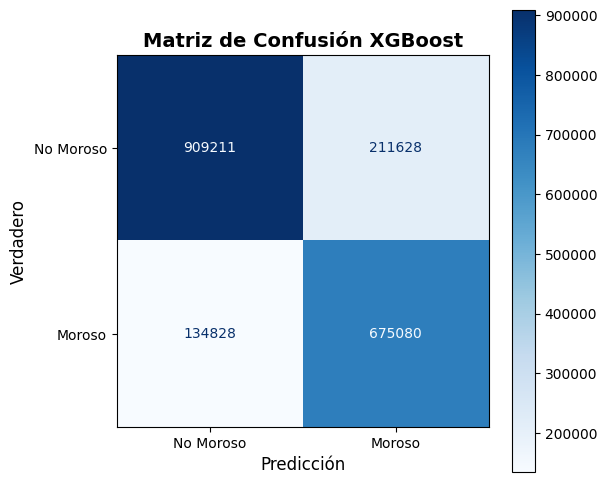

'/mnt/data/matriz_confusion_xgboost.png'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Valores de la matriz de confusión
confusion_matrix_values = np.array([[909211, 211628],
                                    [134828, 675080]])

# Clases para la matriz
classes = ["No Moroso", "Moroso"]

# Crear la visualización de la matriz de confusión
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_values,
                              display_labels=classes)
disp.plot(cmap='Blues', ax=ax, colorbar=True)

# Personalizar etiquetas
plt.xlabel("Predicción", fontsize=12)
plt.ylabel("Verdadero", fontsize=12)

# Agregar título
plt.title("Matriz de Confusión XGBoost", fontsize=14, weight='bold')

# Guardar la imagen
#file_path_confusion_matrix = "/mnt/data/matriz_confusion_xgboost.png"
#plt.savefig(file_path_confusion_matrix, dpi=300, bbox_inches='tight')
plt.show()

file_path_confusion_matrix
